# EDA - Credit Risk Analysis

## PAKDD2010 Dataset

This notebook contains the exploratory data analysis for the credit risk dataset.


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## Verificación de Nombres de Columnas del Dataset

Esta sección muestra las primeras 20 filas del dataset de modeling con todos los nombres de columnas aplicados desde VariablesList.XLS para verificar que estén correctamente asignados.

In [31]:
# Verificar nombres de columnas del dataset de modeling
import sys
from pathlib import Path
import pandas as pd  # Import necesario
project_root = Path("../../")
sys.path.insert(0, str(project_root))

# Cargar dataset con nombres correctos
print("=" * 80)
print("VERIFICACIÓN DE NOMBRES DE COLUMNAS - DATASET DE MODELING")
print("=" * 80)

# Intentar cargar usando get_datasets (debe tener las dependencias instaladas)
try:
    from src.data_utils import get_datasets
    print("[INFO] Cargando datasets usando get_datasets()...")
    app_train, app_test, column_descriptions = get_datasets()
    print("[OK] Dataset cargado usando get_datasets() con nombres desde VariablesList.XLS")
    print(f"[OK] Nombres de columnas aplicados correctamente desde VariablesList.XLS")
except ImportError as e:
    # Si falla por dependencias, mostrar error claro
    print(f"[ERROR] No se pudo usar get_datasets() debido a dependencias faltantes.")
    print(f"        Error completo: {str(e)}")
    print(f"\n[INFO] Para cargar con nombres correctos, DEBES instalar las dependencias:")
    print(f"       pip install openpyxl xlrd")
    print(f"\n[INFO] Sin las dependencias, el dataset NO puede tener nombres correctos.")
    print(f"       Para verificar nombres, ejecuta: python scripts/verify_column_names.py")
    raise ImportError("Dependencias faltantes: openpyxl o xlrd. Instala con: pip install openpyxl xlrd")
except Exception as e:
    import traceback
    print(f"[ERROR] Error al cargar dataset:")
    print(f"        Tipo de error: {type(e).__name__}")
    print(f"        Mensaje: {str(e)}")
    print(f"\n[INFO] Traceback completo:")
    traceback.print_exc()
    raise

print(f"\nDataset de Modeling:")
print(f"  Shape: {app_train.shape}")
print(f"  Total de columnas: {len(app_train.columns)}")
print(f"\nPrimeras 10 nombres de columnas:")
for i, col in enumerate(app_train.columns[:10], 1):
    print(f"  {i:2d}. {col}")
print(f"\nÚltimas 10 nombres de columnas:")
for i, col in enumerate(app_train.columns[-10:], 1):
    idx = len(app_train.columns) - 10 + i
    print(f"  {idx:2d}. {col}")

# Configurar display para ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 25)

print("\n" + "=" * 80)
print("PRIMERAS 20 FILAS DEL DATASET (TODAS LAS COLUMNAS VISIBLES)")
print("=" * 80)
display(app_train.head(20))

print("\n" + "=" * 80)
print("VERIFICACIÓN COMPLETADA")
print("=" * 80)
print(f"\nTotal de columnas: {len(app_train.columns)}")
print(f"Total de filas: {len(app_train)}")


VERIFICACIÓN DE NOMBRES DE COLUMNAS - DATASET DE MODELING
[INFO] Cargando datasets usando get_datasets()...
[OK] Dataset cargado usando get_datasets() con nombres desde VariablesList.XLS
[OK] Nombres de columnas aplicados correctamente desde VariablesList.XLS

Dataset de Modeling:
  Shape: (50000, 54)
  Total de columnas: 54

Primeras 10 nombres de columnas:
   1. ID_CLIENT
   2. CLERK_TYPE
   3. PAYMENT_DAY
   4. APPLICATION_SUBMISSION_TYPE
   5. QUANT_ADDITIONAL_CARDS
   6. POSTAL_ADDRESS_TYPE
   7. SEX
   8. MARITAL_STATUS
   9. QUANT_DEPENDANTS
  10. EDUCATION_LEVEL

Últimas 10 nombres de columnas:
  45. FLAG_HOME_ADDRESS_DOCUMENT
  46. FLAG_RG
  47. FLAG_CPF
  48. FLAG_INCOME_PROOF
  49. PRODUCT
  50. FLAG_ACSP_RECORD
  51. AGE
  52. RESIDENCIAL_ZIP_3
  53. PROFESSIONAL_ZIP_3
  54. TARGET_LABEL_BAD=1

PRIMERAS 20 FILAS DEL DATASET (TODAS LAS COLUMNAS VISIBLES)


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
5,6,C,10,0,0,1,M,2,0,0,MG,CARMO DO RIO CLARO,1,MG,ALFENAS,Campos Eliseos,Y,33,1.0,4.0,N,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,MG,ALFENAS,JARDIM SAO CARLOS,N,,0,9.0,2.0,0.0,0.0,0,0,0,0,2,N,40,371,371,1
6,7,C,15,Carga,0,1,F,2,2,0,BA,salvador,1,BA,SALVADOR,VALERIA,Y,81,1.0,1.0,N,1,320.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,40,413,413,1
7,8,C,25,Web,0,1,F,1,0,0,MG,ATALEIA,1,SP,Itapecerica da Serra,Lagoa,N,,1.0,4.0,N,1,489.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,Barueri,alphaville Industrial,Y,5,0,11.0,2.0,NaN,NaN,0,0,0,0,1,N,28,686,686,0
8,9,C,15,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,MACATUBA,PLANALTO,Y,12,1.0,0.0,N,1,450.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,NaN,NaN,N,,0,0.0,2.0,0.0,0.0,0,0,0,0,2,N,31,172,172,0
9,10,C,5,0,0,1,F,1,0,0,RS,SANTA MARIA,1,RS,PORTO ALEGRE,BOM JESUS,Y,54,1.0,5.0,N,1,1507.0,0.0,1,1,0,0,0,1,1,0.0,1,Y,RS,PORTO ALEGRE,MENINO DEUS,Y,54,0,9.0,2.0,11.0,0.0,0,0,0,0,1,N,41,914,914,0



VERIFICACIÓN COMPLETADA

Total de columnas: 54
Total de filas: 50000


## Verificación de Categorías Únicas - Variables Geográficas

Esta sección verifica cuántas categorías únicas tiene cada variable geográfica, lo cual es importante para decidir si usar selectbox o text_input en la UI.

In [32]:
# Verificar categorías únicas de variables geográficas
# Importar función para cargar datos con nombres correctos
import sys
from pathlib import Path
project_root = Path("../../")
sys.path.insert(0, str(project_root))

from src.data_utils import get_datasets

# Variables geográficas a verificar
GEOGRAPHIC_VARS = [
    "STATE_OF_BIRTH",
    "CITY_OF_BIRTH",
    "RESIDENCIAL_STATE",
    "RESIDENCIAL_CITY",
    "RESIDENCIAL_BOROUGH",
    "RESIDENCIAL_PHONE_AREA_CODE",
    "RESIDENCIAL_ZIP_3",
    "PROFESSIONAL_STATE",
    "PROFESSIONAL_PHONE_AREA_CODE",
    "PROFESSIONAL_CITY",
    "PROFESSIONAL_ZIP_3",
    "PROFESSIONAL_BOROUGH",
]

# Cargar datos con nombres correctos
app_train, app_test, _ = get_datasets()

# Combinar train y test para tener todas las categorías
full_df = app_train.copy()
if app_test is not None:
    full_df = pd.concat([app_train, app_test], ignore_index=True)

print(f"Dataset shape: {full_df.shape}")
print("\n" + "="*80)
print("VERIFICACIÓN DE CATEGORÍAS ÚNICAS - VARIABLES GEOGRÁFICAS")
print("="*80)

results = {}

for var in GEOGRAPHIC_VARS:
    if var in full_df.columns:
        # Valores únicos excluyendo NaN
        unique_vals = full_df[var].dropna().unique()
        num_unique = len(unique_vals)
        
        # Calcular porcentaje de missing
        num_missing = full_df[var].isna().sum()
        pct_missing = (num_missing / len(full_df)) * 100
        
        # Calcular frecuencia de los valores más comunes
        value_counts = full_df[var].value_counts().head(10)
        
        results[var] = {
            "num_unique": num_unique,
            "num_missing": num_missing,
            "pct_missing": pct_missing,
            "top_10_values": value_counts
        }
        
        print(f"\n{var}:")
        print(f"  - Categorías únicas: {num_unique:,}")
        print(f"  - Missing values: {num_missing:,} ({pct_missing:.2f}%)")
        print(f"  - Valores válidos: {len(full_df) - num_missing:,}")
        
        if num_unique <= 20:
            print(f"  - Todas las categorías: {sorted(unique_vals.tolist())}")
        elif num_unique <= 100:
            print(f"  - Primeras 20 categorías: {sorted(unique_vals.tolist())[:20]}")
            print(f"  - Últimas 10 categorías: {sorted(unique_vals.tolist())[-10:]}")
        else:
            print(f"  - Top 10 valores más frecuentes:")
            for val, count in value_counts.items():
                pct = (count / len(full_df)) * 100
                print(f"      {val}: {count:,} ({pct:.2f}%)")
            
            # Verificar si hay valores muy raros (aparecen solo una vez)
            single_occurrence = (full_df[var].value_counts() == 1).sum()
            if single_occurrence > 0:
                print(f"  - Valores que aparecen solo 1 vez: {single_occurrence:,} ({single_occurrence/num_unique*100:.1f}% de categorías)")
    else:
        print(f"\n{var}: NO ENCONTRADA EN EL DATASET")
        results[var] = None

print("\n" + "="*80)
print("RESUMEN")
print("="*80)
print("\nVariables con MÁS categorías únicas:")
sorted_by_unique = sorted(
    [(k, v["num_unique"]) for k, v in results.items() if v is not None],
    key=lambda x: x[1],
    reverse=True
)
for var, num_unique in sorted_by_unique:
    print(f"  {var}: {num_unique:,} categorías")

print("\nVariables con MÁS missing values:")
sorted_by_missing = sorted(
    [(k, v["pct_missing"]) for k, v in results.items() if v is not None],
    key=lambda x: x[1],
    reverse=True
)
for var, pct_missing in sorted_by_missing[:5]:
    print(f"  {var}: {pct_missing:.2f}% missing")

Dataset shape: (70000, 54)

VERIFICACIÓN DE CATEGORÍAS ÚNICAS - VARIABLES GEOGRÁFICAS

STATE_OF_BIRTH:
  - Categorías únicas: 29
  - Missing values: 0 (0.00%)
  - Valores válidos: 70,000
  - Primeras 20 categorías: [' ', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ']
  - Últimas 10 categorías: ['RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'XX']

CITY_OF_BIRTH:
  - Categorías únicas: 11,970
  - Missing values: 10 (0.01%)
  - Valores válidos: 69,990
  - Top 10 valores más frecuentes:
       : 2,064 (2.95%)
      RIO DE JANEIRO: 1,782 (2.55%)
      SAO PAULO: 1,261 (1.80%)
      RECIFE: 1,210 (1.73%)
      FORTALEZA: 1,087 (1.55%)
      PELOTAS: 844 (1.21%)
      SALVADOR: 682 (0.97%)
      PORTO ALEGRE: 581 (0.83%)
      NATAL: 560 (0.80%)
      BELEM: 504 (0.72%)
  - Valores que aparecen solo 1 vez: 6,909 (57.7% de categorías)

RESIDENCIAL_STATE:
  - Categorías únicas: 27
  - Missing values: 0 (0.00%)
  - Valore

## Verificación del Dataset de Predicción (Test)

Esta sección verifica si el archivo `PAKDD2010_Prediction_Data.txt` tiene la columna target (`TARGET_LABEL_BAD=1`) y si contiene valores válidos (no todos NaN). Esto es importante para entender si este dataset puede ser usado para evaluación del modelo o solo para predicción.


In [33]:
# Verificar si el dataset de predicción tiene target
import sys
from pathlib import Path
import os

project_root = Path("../../")
sys.path.insert(0, str(project_root))

# Definir paths directamente
data_raw_dir = project_root / "data" / "raw"
dataset_test_path = data_raw_dir / "PAKDD2010_Prediction_Data.txt"
dataset_train_path = data_raw_dir / "PAKDD2010_Modeling_Data.txt"

print("=" * 80)
print("VERIFICACIÓN DEL DATASET DE PREDICCIÓN (PAKDD2010_Prediction_Data.txt)")
print("=" * 80)

# Verificar si existe el archivo de test
if not dataset_test_path.exists():
    print(f"\n[INFO] El archivo de test NO existe.")
    print(f"       Path esperado: {dataset_test_path}")
    print(f"       Path absoluto: {dataset_test_path.absolute()}")
else:
    print(f"\n[OK] Archivo de test encontrado: {dataset_test_path}")
    
    # Intentar cargar usando get_datasets (si tiene las dependencias)
    try:
        from src.data_utils import get_datasets
        app_train, app_test, _ = get_datasets()
        print(f"[OK] Datasets cargados usando get_datasets()")
        
    except ImportError as e:
        # Si falla por dependencias, cargar directamente desde CSV
        print(f"[WARNING] No se pudo usar get_datasets() debido a dependencias faltantes.")
        print(f"          Cargando dataset directamente desde CSV...")
        print(f"          (Error: {str(e)[:100]}...)")
        
        # Cargar directamente desde CSV (asumimos que tiene 54 columnas, última es target)
        # Cargar solo la última columna para verificar el target
        try:
            # Leer solo la última columna (índice 53, columna 54)
            app_test = pd.read_csv(
                dataset_test_path,
                sep="\t",
                header=None,
                usecols=[53],  # Última columna
                names=["TARGET_LABEL_BAD=1"],
                na_values=["NULL"],
                encoding="latin1",
                low_memory=False
            )
            
            # También cargar train para comparación
            app_train_target = pd.read_csv(
                dataset_train_path,
                sep="\t",
                header=None,
                usecols=[53],  # Última columna
                names=["TARGET_LABEL_BAD=1"],
                na_values=["NULL"],
                encoding="latin1",
                low_memory=False
            )
            
            print(f"[OK] Dataset de test cargado directamente")
            print(f"     Shape del dataset de test: ({len(app_test)}, 1 columna target)")
            
        except Exception as e2:
            print(f"\n[ERROR] No se pudo cargar el dataset: {str(e2)}")
            app_test = None
    
    if app_test is not None:
        # Verificar si tiene la columna target
        TARGET_COL = "TARGET_LABEL_BAD=1"
        
        if TARGET_COL in app_test.columns:
            print(f"\n[OK] El dataset de test tiene la columna target: '{TARGET_COL}'")
            
            # Extraer target
            y_test = app_test[TARGET_COL]
            
            # Verificar valores
            total_samples = len(y_test)
            nan_count = y_test.isna().sum()
            valid_count = (~y_test.isna()).sum()
            nan_percentage = (nan_count / total_samples) * 100
            
            print(f"\n" + "-" * 80)
            print("ANÁLISIS DE LA COLUMNA TARGET:")
            print("-" * 80)
            print(f"  Total de muestras: {total_samples:,}")
            print(f"  Valores válidos (no NaN): {valid_count:,} ({100-nan_percentage:.2f}%)")
            print(f"  Valores NaN: {nan_count:,} ({nan_percentage:.2f}%)")
            
            if nan_count == total_samples:
                print(f"\n  ⚠️  ADVERTENCIA: TODOS los valores del target son NaN")
                print(f"     Este archivo es un archivo de PREDICCIÓN (sin labels),")
                print(f"     NO puede ser usado para EVALUACIÓN del modelo.")
                print(f"     El sistema dividirá automáticamente el dataset de entrenamiento")
                print(f"     en train/val/test para evaluación.")
            elif nan_count > 0:
                print(f"\n  ⚠️  ADVERTENCIA: Hay {nan_count:,} valores NaN ({nan_percentage:.2f}%)")
                print(f"     El sistema filtrará estos valores antes de evaluar el modelo.")
                
                # Mostrar distribución de valores válidos
                valid_values = y_test.dropna()
                print(f"\n  Distribución de valores VÁLIDOS:")
                value_counts = valid_values.value_counts()
                for val, count in value_counts.items():
                    percentage = (count / len(valid_values)) * 100
                    print(f"    Clase {val}: {count:,} muestras ({percentage:.2f}%)")
            else:
                print(f"\n  ✓ Todos los valores son válidos (no hay NaN)")
                print(f"     Este archivo PUEDE ser usado para evaluación del modelo.")
                
                # Mostrar distribución completa
                print(f"\n  Distribución completa del target:")
                value_counts = y_test.value_counts()
                for val, count in value_counts.items():
                    percentage = (count / total_samples) * 100
                    print(f"    Clase {val}: {count:,} muestras ({percentage:.2f}%)")
                
                # Comparar distribución con train si está disponible
                try:
                    y_train = app_train_target[TARGET_COL] if 'app_train_target' in locals() else None
                    if y_train is not None:
                        print(f"\n  Comparación con dataset de entrenamiento:")
                        train_value_counts = y_train.value_counts()
                        for val in sorted(value_counts.index):
                            test_count = value_counts.get(val, 0)
                            train_count = train_value_counts.get(val, 0)
                            test_pct = (test_count / total_samples) * 100
                            train_pct = (train_count / len(y_train)) * 100
                            print(f"    Clase {val}: Test={test_count:,} ({test_pct:.2f}%) | Train={train_count:,} ({train_pct:.2f}%)")
                except:
                    print(f"\n  (No se pudo cargar el dataset de train para comparación)")
        else:
            print(f"\n  ❌ ERROR: El dataset de test NO tiene la columna target '{TARGET_COL}'")
            print(f"     Columnas disponibles: {list(app_test.columns)}")

print("\n" + "=" * 80)


VERIFICACIÓN DEL DATASET DE PREDICCIÓN (PAKDD2010_Prediction_Data.txt)

[OK] Archivo de test encontrado: ..\..\data\raw\PAKDD2010_Prediction_Data.txt
[OK] Datasets cargados usando get_datasets()

[OK] El dataset de test tiene la columna target: 'TARGET_LABEL_BAD=1'

--------------------------------------------------------------------------------
ANÁLISIS DE LA COLUMNA TARGET:
--------------------------------------------------------------------------------
  Total de muestras: 20,000
  Valores válidos (no NaN): 0 (0.00%)
  Valores NaN: 20,000 (100.00%)

  ⚠️  ADVERTENCIA: TODOS los valores del target son NaN
     Este archivo es un archivo de PREDICCIÓN (sin labels),
     NO puede ser usado para EVALUACIÓN del modelo.
     El sistema dividirá automáticamente el dataset de entrenamiento
     en train/val/test para evaluación.



In [34]:
# Definir df = app_train para compatibilidad con las celdas de exploración
# Si app_train no está definido (porque las verificaciones fallaron), cargar el dataset directamente
try:
    # Intentar usar app_train si ya está cargado
    if 'app_train' not in globals():
        from src.data_utils import get_datasets
        app_train, app_test, column_descriptions = get_datasets()
        print("[OK] Dataset cargado usando get_datasets()")
    df = app_train
    print(f"[OK] Variable 'df' definida. Shape: {df.shape}")
except Exception as e:
    # Si falla, cargar directamente sin nombres
    print(f"[WARNING] No se pudo usar app_train. Cargando dataset directamente...")
    from pathlib import Path
    data_path = Path("../../data/raw/PAKDD2010_Modeling_Data.txt")
    df = pd.read_csv(data_path, sep='\t', low_memory=False, encoding='latin-1')
    print(f"[OK] Dataset cargado directamente. Shape: {df.shape}")
    print("[WARNING] El dataset NO tiene nombres de columnas correctos.")


[OK] Variable 'df' definida. Shape: (50000, 54)


In [35]:
# Display first few rows
df.head()


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [36]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [37]:
# Display column names
print(f"Total number of columns: {len(df.columns)}")
print("\nColumn names:")
print(df.columns.tolist())


Total number of columns: 54

Column names:
['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FL

In [38]:
# Basic statistics for numerical columns
df.describe()


,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


In [39]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print(f"Total columns with missing values: {len(missing_df)}")
print(f"\nColumns with missing values:")
missing_df


Total columns with missing values: 8

Columns with missing values:


,Column,Missing Count,Missing Percentage
35,PROFESSIONAL_CITY,33783,67.566
36,PROFESSIONAL_BOROUGH,33783,67.566
43,MATE_EDUCATION_LEVEL,32338,64.676
42,MATE_PROFESSION_CODE,28884,57.768
40,PROFESSION_CODE,7756,15.512
41,OCCUPATION_TYPE,7313,14.626
19,MONTHS_IN_RESIDENCE,3777,7.554
18,RESIDENCE_TYPE,1349,2.698


In [40]:
# Check data types
print("Data types summary:")
print(df.dtypes.value_counts())
print("\nDetailed data types:")
df.dtypes


Data types summary:
int64      25
object     20
float64     9
dtype: int64

Detailed data types:


ID_CLIENT                       int64
CLERK_TYPE                     object
PAYMENT_DAY                     int64
APPLICATION_SUBMISSION_TYPE    object
QUANT_ADDITIONAL_CARDS          int64
                                ...  
FLAG_ACSP_RECORD               object
AGE                             int64
RESIDENCIAL_ZIP_3              object
PROFESSIONAL_ZIP_3             object
TARGET_LABEL_BAD=1              int64
Length: 54, dtype: object

In [41]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")


Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [42]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"\nNumerical columns: {numerical_cols}...")  
print(f"\nCategorical columns: {categorical_cols}...")  


Numerical columns: 34
Categorical columns: 20

Numerical columns: ['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1']...

Categorical columns: ['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY', 'PROFES

In [43]:
# Check for columns with constant values (no variance)
constant_cols = []
for col in df.columns:
    if df[col].nunique() <= 1:
        constant_cols.append(col)

print(f"Columns with constant values (no variance): {len(constant_cols)}")
if constant_cols:
    print(f"\nConstant columns: {constant_cols}")
else:
    print("\nNo constant columns found.")


Columns with constant values (no variance): 9

Constant columns: ['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']


In [44]:
# Check for columns with very high cardinality (potential identifiers)
high_cardinality = []
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio > 0.5:  # More than 50% unique values
        high_cardinality.append((col, df[col].nunique(), unique_ratio))

if high_cardinality:
    print("Columns with high cardinality (potential IDs):")
    for col, n_unique, ratio in high_cardinality:
        print(f"  {col}: {n_unique} unique values ({ratio*100:.1f}%)")
else:
    print("No high cardinality columns found.")


Columns with high cardinality (potential IDs):
  ID_CLIENT: 50000 unique values (100.0%)


In [45]:
# Display last few rows to check data consistency
df.tail()


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Z...,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1
49999,50000,C,10,Web,0,1,F,2,2,0,SP,PINDABA,1,SP,Pindamonhangaba,Feital,N,,1.0,9.0,N,1,719.38,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,PINDABA,CIDADE NOVA,Y,9,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,27,124,124,0


In [46]:
# Check memory usage
memory_usage = df.memory_usage(deep=True)
print(f"Total memory usage: {memory_usage.sum() / 1024**2:.2f} MB")
print(f"\nTop 10 columns by memory usage:")
memory_usage.sort_values(ascending=False).head(10)


Total memory usage: 68.57 MB

Top 10 columns by memory usage:


RESIDENCIAL_BOROUGH            3400722
RESIDENCIAL_CITY               3337275
CITY_OF_BIRTH                  3311080
PROFESSIONAL_ZIP_3             3000004
RESIDENCIAL_ZIP_3              3000004
APPLICATION_SUBMISSION_TYPE    2965744
RESIDENCIAL_STATE              2950000
RESIDENCIAL_PHONE_AREA_CODE    2948104
STATE_OF_BIRTH                 2947936
PROFESSIONAL_STATE             2915693
dtype: int64

## Initial Summary

Based on the initial exploration above, we can see:
- Dataset dimensions
- Column types and names
- Missing values distribution
- Basic statistics

Next steps: deeper analysis of distributions, correlations, and target variable (if identified).


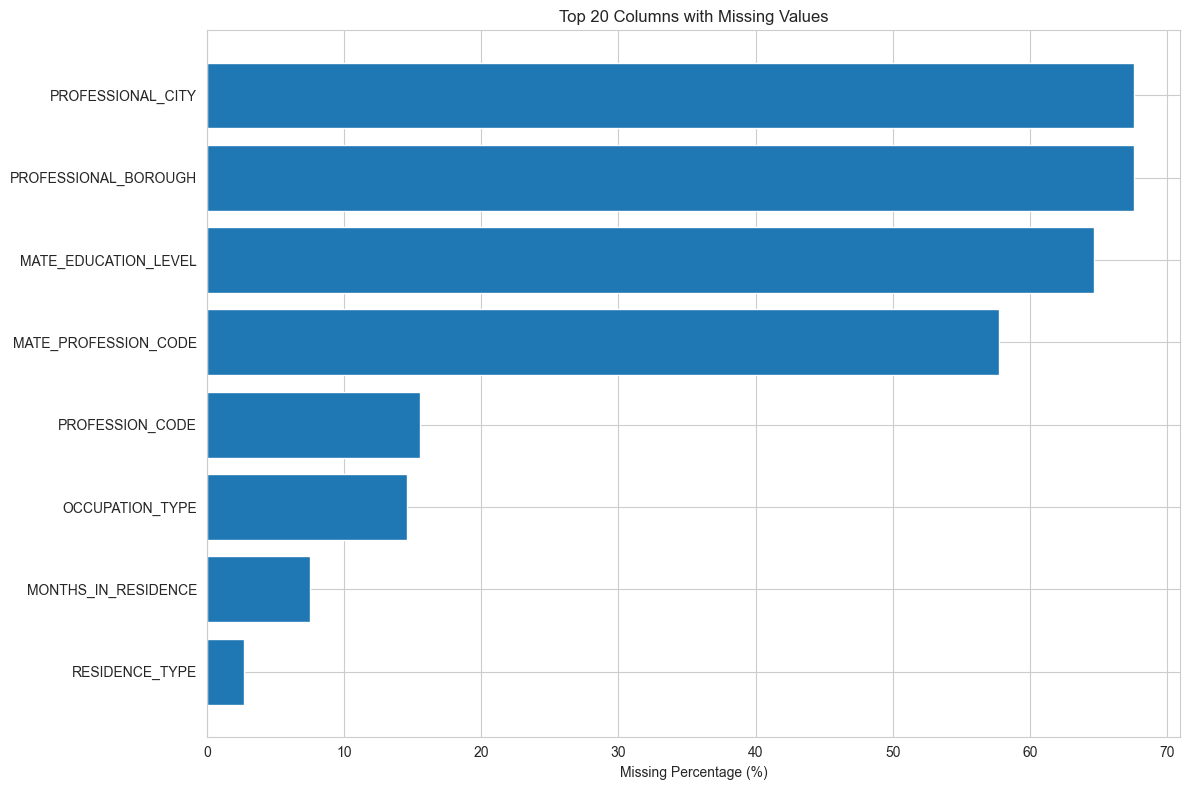

In [47]:
# Visualize missing values pattern
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(20)  # Top 20 columns with missing values
    plt.barh(range(len(top_missing)), top_missing['Missing Percentage'].values)
    plt.yticks(range(len(top_missing)), top_missing['Column'].values)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")


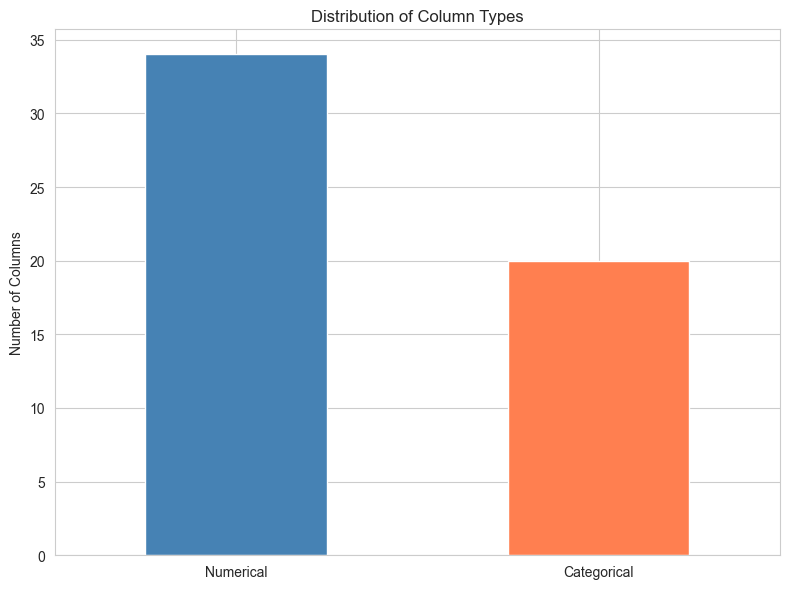

In [48]:
# Distribution of data types
if len(numerical_cols) > 0 or len(categorical_cols) > 0:
    type_counts = pd.Series({
        'Numerical': len(numerical_cols),
        'Categorical': len(categorical_cols)
    })
    
    plt.figure(figsize=(8, 6))
    type_counts.plot(kind='bar', color=['steelblue', 'coral'])
    plt.title('Distribution of Column Types')
    plt.ylabel('Number of Columns')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Deep Analysis: Target Variable, Outliers, and Feature Influence


Target variable: 'TARGET_LABEL_BAD=1'

Target distribution:
0    36959
1    13041
Name: TARGET_LABEL_BAD=1, dtype: int64

Target distribution (percentage):
0    73.918
1    26.082
Name: TARGET_LABEL_BAD=1, dtype: float64

Target data type: int64
Unique values: [1 0]


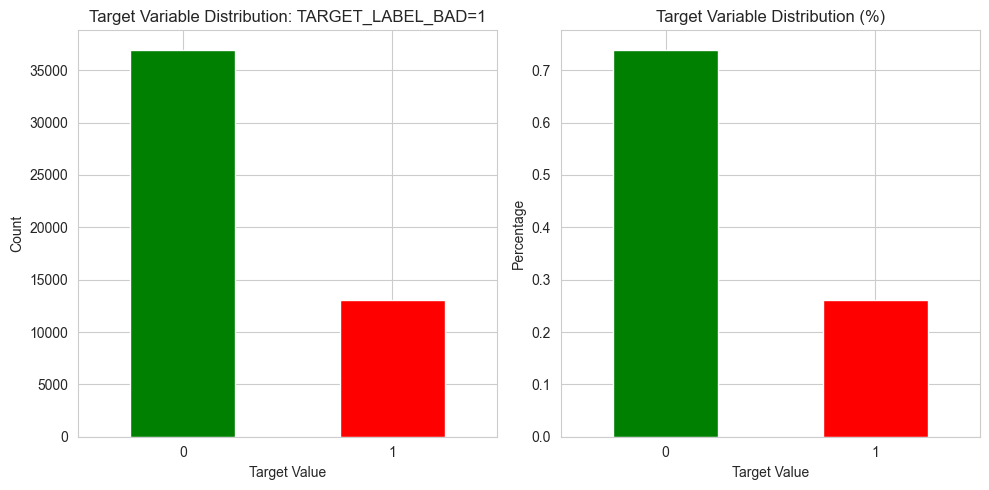

Removing ID column: 'ID_CLIENT'

Number of features: 52


In [49]:
# Identify target variable (last column)
target_col = df.columns[-1]
print(f"Target variable: '{target_col}'")
print(f"\nTarget distribution:")
print(df[target_col].value_counts())
print(f"\nTarget distribution (percentage):")
print(df[target_col].value_counts(normalize=True) * 100)
print(f"\nTarget data type: {df[target_col].dtype}")
print(f"Unique values: {df[target_col].unique()}")

# Create target variable for analysis
target = df[target_col].copy()

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
target.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title(f'Target Variable Distribution: {target_col}')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
target.value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title(f'Target Variable Distribution (%)')
plt.xlabel('Target Value')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Separate features from target (exclude ID column if it exists)
# Check if there's an ID column (usually the first column)
id_col = df.columns[0] if len(df.columns) > 0 else None
# Common ID column names
id_col_names = ['ID_CLIENT', '1', 'ID', 'id', 'client_id']
id_col_to_remove = None

# Find the ID column if it exists
for col in df.columns:
    if col in id_col_names or (col == df.columns[0] and df[col].dtype in ['int64', 'int32'] and df[col].nunique() == len(df)):
        id_col_to_remove = col
        break

# Remove target and ID column (if found)
cols_to_remove = [target_col]
if id_col_to_remove and id_col_to_remove != target_col:
    cols_to_remove.append(id_col_to_remove)
    print(f"Removing ID column: '{id_col_to_remove}'")

features_df = df.drop(columns=cols_to_remove)
print(f"\nNumber of features: {len(features_df.columns)}")


### Outlier Detection and Analysis


In [50]:
# Outlier Detection using IQR (Interquartile Range) method
def detect_outliers_iqr(data, col):
    """Detect outliers using IQR method"""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Outlier Detection using Z-score method
def detect_outliers_zscore(data, col, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
    outliers = data[z_scores > threshold]
    return outliers, z_scores

# Analyze outliers for all numerical columns
outlier_summary = []
numerical_features = features_df.select_dtypes(include=[np.number]).columns.tolist()

print("="*70)
print("OUTLIER ANALYSIS SUMMARY")
print("="*70)

for col in numerical_features:
    if features_df[col].isnull().all():
        continue
        
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(features_df, col)
    n_outliers_iqr = len(outliers_iqr)
    pct_outliers_iqr = (n_outliers_iqr / len(features_df)) * 100
    
    # Z-score method
    outliers_zscore, z_scores = detect_outliers_zscore(features_df, col, threshold=3)
    n_outliers_zscore = len(outliers_zscore)
    pct_outliers_zscore = (n_outliers_zscore / len(features_df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outliers (IQR)': n_outliers_iqr,
        'Outliers % (IQR)': round(pct_outliers_iqr, 2),
        'Outliers (Z-score)': n_outliers_zscore,
        'Outliers % (Z-score)': round(pct_outliers_zscore, 2),
        'Min': features_df[col].min(),
        'Q1': features_df[col].quantile(0.25),
        'Median': features_df[col].median(),
        'Q3': features_df[col].quantile(0.75),
        'Max': features_df[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outliers % (IQR)', ascending=False)

print(f"\nColumns with most outliers (IQR method):")
print(outlier_df.head(15).to_string(index=False))

# Save top columns with outliers for visualization
top_outlier_cols = outlier_df.head(6)['Column'].tolist()


OUTLIER ANALYSIS SUMMARY

Columns with most outliers (IQR method):
                 Column  Outliers (IQR)  Outliers % (IQR)  Outliers (Z-score)  Outliers % (Z-score)  Min    Q1  Median    Q3       Max
        PROFESSION_CODE           12152             24.30                   1                  0.00  0.0   9.0     9.0   9.0      18.0
             FLAG_EMAIL            9886             19.77                   0                  0.00  0.0   1.0     1.0   1.0       1.0
            PAYMENT_DAY            8787             17.57                   0                  0.00  1.0  10.0    10.0  15.0      25.0
         MARITAL_STATUS            7913             15.83                 534                  1.07  0.0   1.0     2.0   2.0       7.0
                PRODUCT            7310             14.62                1295                  2.59  1.0   1.0     1.0   1.0       7.0
         RESIDENCE_TYPE            7079             14.16                2294                  4.59  0.0   1.0     1.0   1.

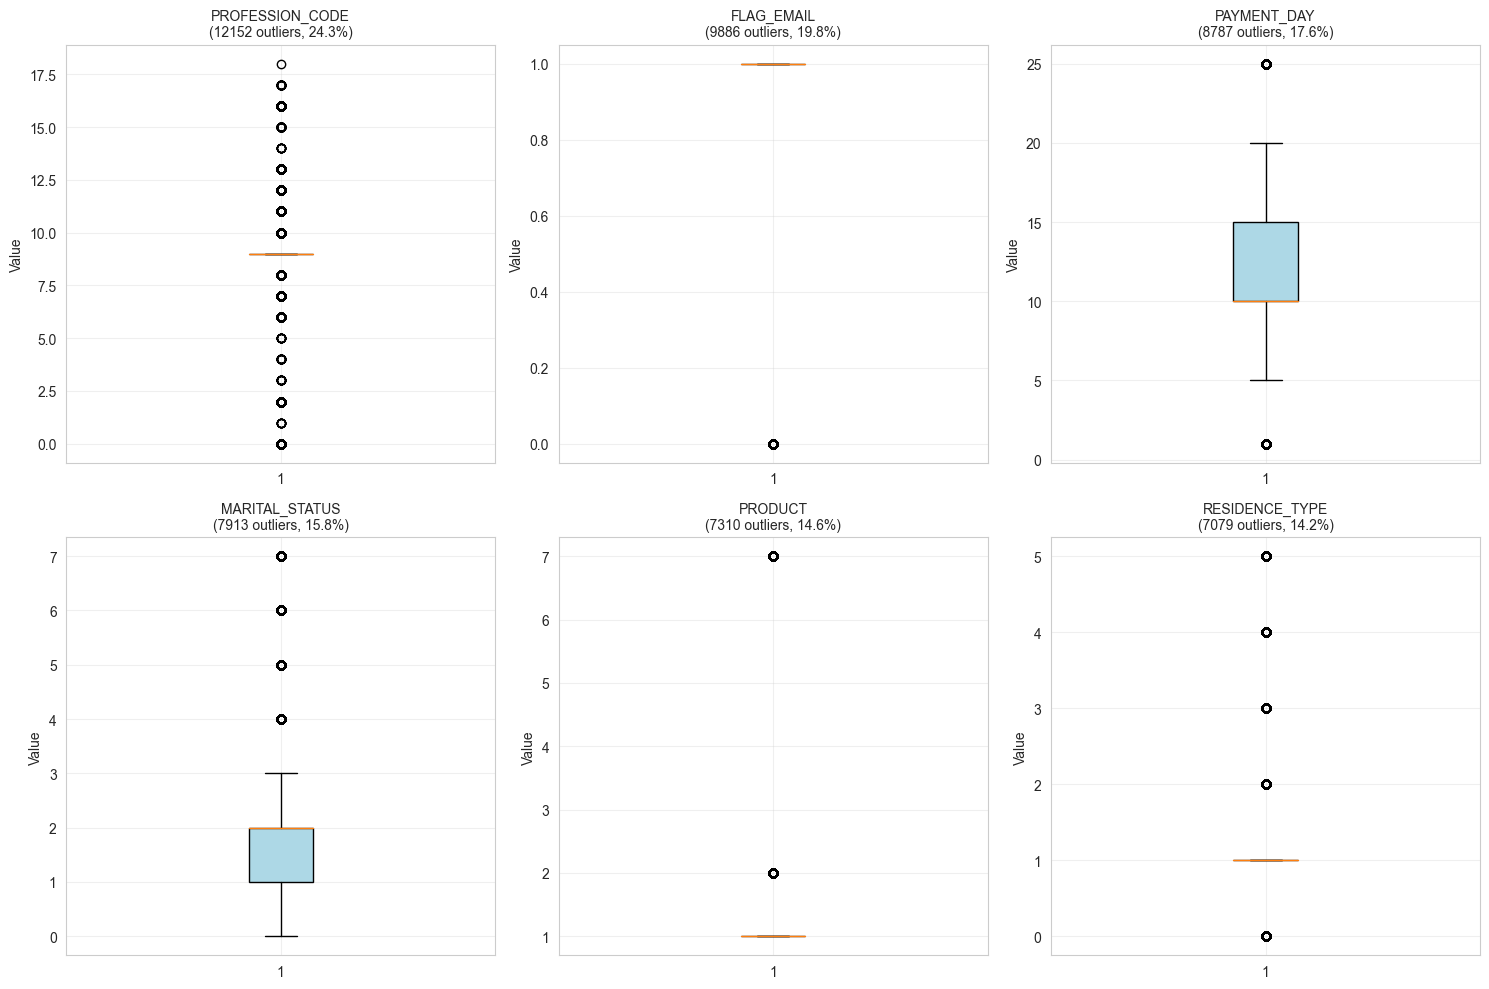

In [51]:
# Visualize outliers for top columns
if len(top_outlier_cols) > 0:
    n_cols = min(3, len(top_outlier_cols))
    n_rows = (len(top_outlier_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(top_outlier_cols[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Box plot to visualize outliers
        box_data = features_df[col].dropna()
        bp = ax.boxplot(box_data, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        
        # Add outliers count
        outliers_iqr, _, _ = detect_outliers_iqr(features_df, col)
        n_outliers = len(outliers_iqr)
        
        ax.set_title(f'{col}\n({n_outliers} outliers, {n_outliers/len(features_df)*100:.1f}%)', fontsize=10)
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(top_outlier_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Feature Influence on Target Variable


NUMERICAL FEATURES INFLUENCE ON TARGET


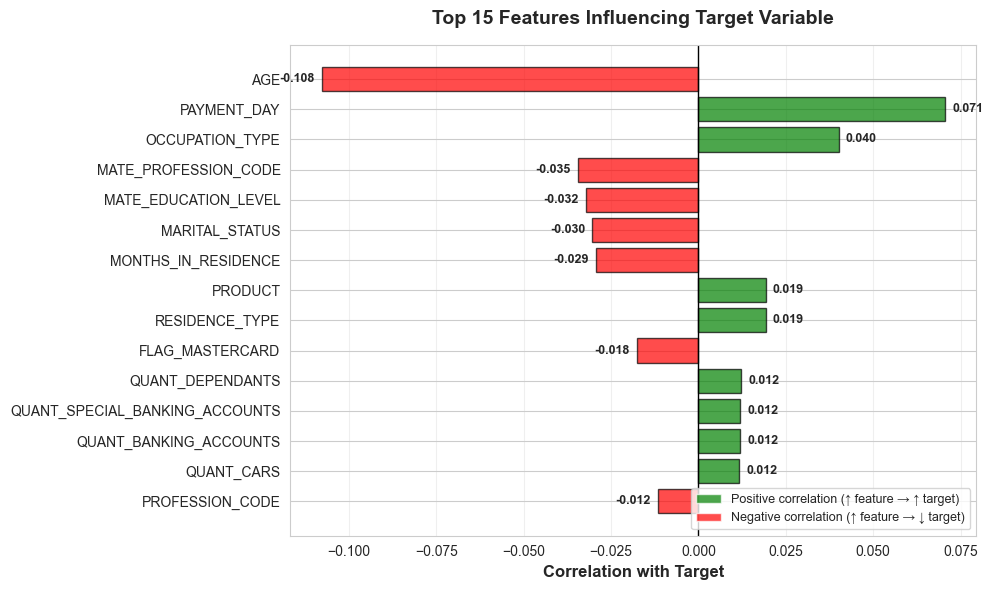


Top 15 features influencing target:
                       Feature  Correlation
                           AGE      -0.1079
                   PAYMENT_DAY       0.0706
               OCCUPATION_TYPE       0.0402
          MATE_PROFESSION_CODE      -0.0345
          MATE_EDUCATION_LEVEL      -0.0322
                MARITAL_STATUS      -0.0304
           MONTHS_IN_RESIDENCE      -0.0293
                       PRODUCT       0.0193
                RESIDENCE_TYPE       0.0192
               FLAG_MASTERCARD      -0.0177
              QUANT_DEPENDANTS       0.0122
        QUANT_BANKING_ACCOUNTS       0.0120
QUANT_SPECIAL_BANKING_ACCOUNTS       0.0120
                    QUANT_CARS       0.0117
               PROFESSION_CODE      -0.0116


In [52]:
# Analyze numerical features' influence on target
print("="*70)
print("NUMERICAL FEATURES INFLUENCE ON TARGET")
print("="*70)

# Calculate correlation with target for all numerical features
feature_influence = []

for col in numerical_features:
    if features_df[col].isnull().all():
        continue
    
    # Calculate correlation with target
    correlation = df[col].corr(df[target_col])
    
    # Calculate mean difference between target classes
    target_values = sorted(df[target_col].unique())
    if len(target_values) == 2:
        mean_class0 = df[df[target_col] == target_values[0]][col].mean()
        mean_class1 = df[df[target_col] == target_values[1]][col].mean()
        mean_diff = abs(mean_class1 - mean_class0)
        
        feature_influence.append({
            'Feature': col,
            'Correlation': round(correlation, 4),
            'Abs Correlation': abs(correlation)
        })

influence_df = pd.DataFrame(feature_influence)
influence_df = influence_df.sort_values('Abs Correlation', ascending=False)

# Select top 15 features
top_n = min(15, len(influence_df))
top_features = influence_df.head(top_n).copy()

# Create horizontal bar chart (much clearer than heatmap)
fig, ax = plt.subplots(figsize=(10, max(6, top_n * 0.4)))

# Sort by absolute correlation for better visualization
top_features_sorted = top_features.sort_values('Abs Correlation', ascending=True)

# Create colors: green for positive, red for negative
colors = ['green' if x > 0 else 'red' for x in top_features_sorted['Correlation']]

# Create horizontal bar chart
bars = ax.barh(range(len(top_features_sorted)), 
               top_features_sorted['Correlation'].values,
               color=colors, 
               alpha=0.7,
               edgecolor='black',
               linewidth=1)

# Add value labels on bars
for i, (idx, row) in enumerate(top_features_sorted.iterrows()):
    value = row['Correlation']
    x_pos = value + 0.002 if value > 0 else value - 0.002
    ax.text(x_pos, i, f'{value:.3f}', 
            va='center', ha='left' if value > 0 else 'right',
            fontsize=9, fontweight='bold')

# Customize chart
ax.set_yticks(range(len(top_features_sorted)))
ax.set_yticklabels(top_features_sorted['Feature'].values, fontsize=10)
ax.set_xlabel('Correlation with Target', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Features Influencing Target Variable', 
             fontsize=14, fontweight='bold', pad=15)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Positive correlation (↑ feature → ↑ target)'),
    Patch(facecolor='red', alpha=0.7, label='Negative correlation (↑ feature → ↓ target)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# Display summary
print(f"\nTop {top_n} features influencing target:")
print(top_features[['Feature', 'Correlation']].to_string(index=False))


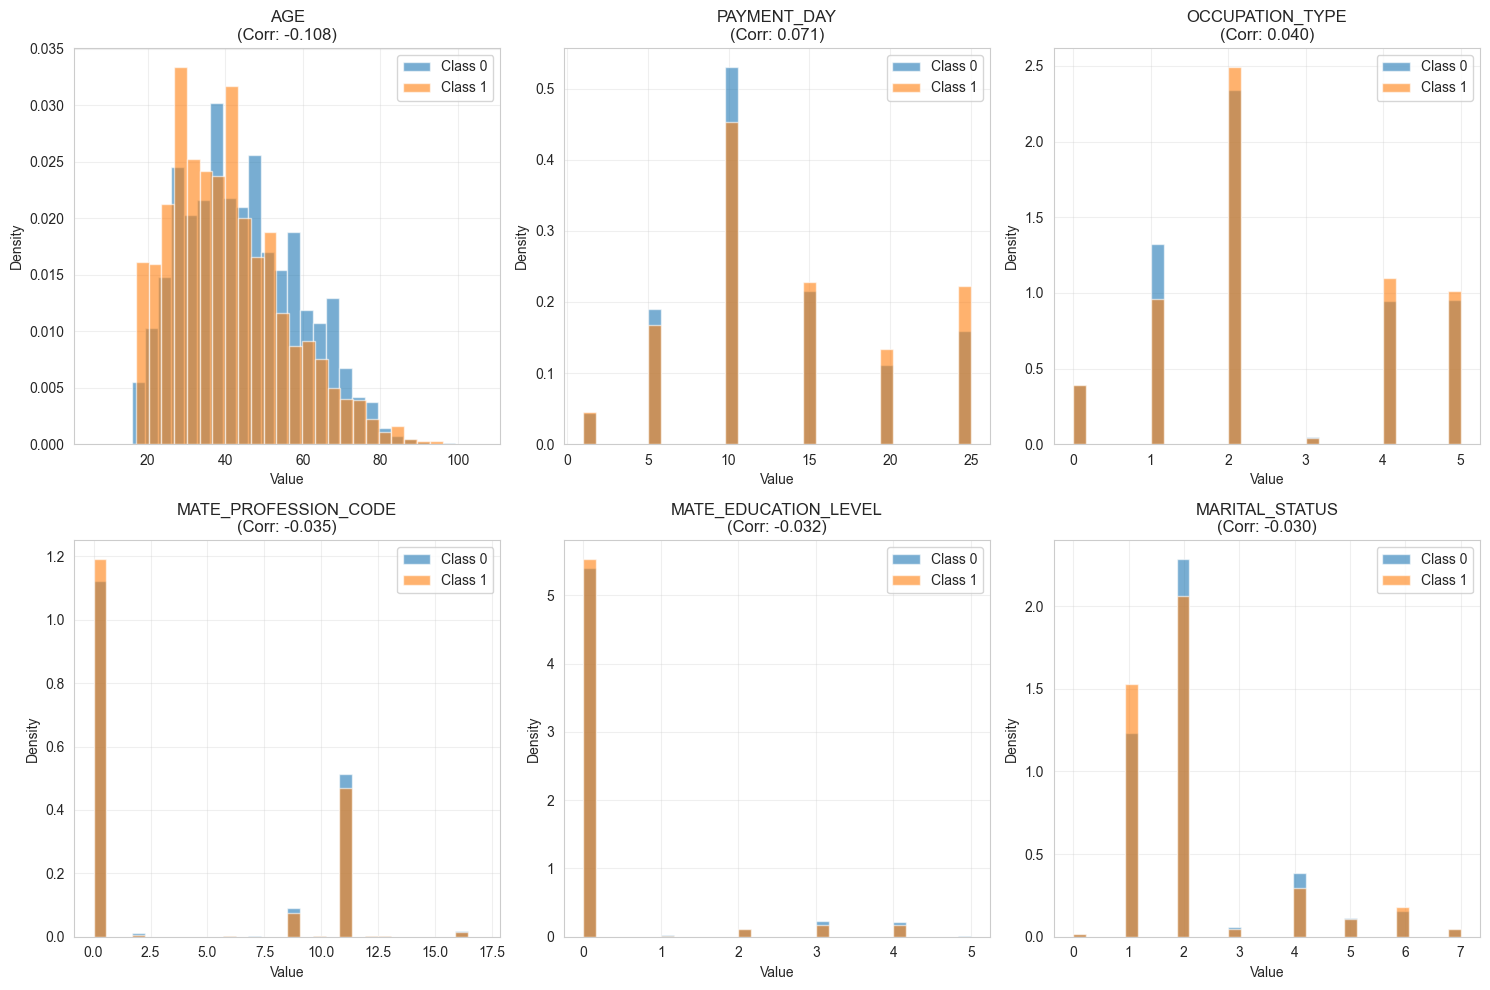

In [53]:
# Visualize distributions of top features by target class
top_features = influence_df.head(6)['Feature'].tolist()

if len(top_features) > 0:
    n_cols = 3
    n_rows = (len(top_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    target_values = sorted(df[target_col].unique())
    
    for idx, col in enumerate(top_features[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Plot distributions for each target class
        for target_val in target_values:
            data = df[df[target_col] == target_val][col].dropna()
            ax.hist(data, alpha=0.6, label=f'Class {target_val}', bins=30, density=True)
        
        ax.set_title(f'{col}\n(Corr: {influence_df[influence_df["Feature"]==col]["Correlation"].values[0]:.3f})')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(top_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Categorical Features Influence on Target


In [54]:
# Analyze categorical features' influence on target
print("="*70)
print("CATEGORICAL FEATURES INFLUENCE ON TARGET")
print("="*70)

categorical_features = features_df.select_dtypes(include=['object']).columns.tolist()
categorical_influence = []

target_values = sorted(df[target_col].unique())

for col in categorical_features:
    if features_df[col].isnull().all():
        continue
    
    # Calculate distribution by target
    crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
    
    # Calculate which categories are more associated with each target class
    if len(target_values) == 2:
        # Get the difference in percentage between classes
        diff = abs(crosstab[target_values[1]] - crosstab[target_values[0]])
        max_diff = diff.max()
        
        # Chi-square test for independence
        try:
            from scipy.stats import chi2_contingency
            contingency_table = pd.crosstab(df[col], df[target_col])
            if contingency_table.min().min() > 0:  # Avoid division by zero
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            else:
                chi2, p_value = 0, 1
        except ImportError:
            print(f"Warning: scipy not available. Skipping chi-square test for {col}")
            chi2, p_value = 0, 1
        except Exception as e:
            chi2, p_value = 0, 1
        
        categorical_influence.append({
            'Feature': col,
            'Unique Values': df[col].nunique(),
            'Max % Difference': round(max_diff, 2),
            'Chi-square': round(chi2, 4),
            'P-value': round(p_value, 6),
            'Significant (p<0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

cat_influence_df = pd.DataFrame(categorical_influence)
cat_influence_df = cat_influence_df.sort_values('P-value', ascending=True)

print(f"\nCategorical features by statistical significance:")
print(cat_influence_df.head(15).to_string(index=False))


CATEGORICAL FEATURES INFLUENCE ON TARGET

Categorical features by statistical significance:
                     Feature  Unique Values  Max % Difference  Chi-square  P-value Significant (p<0.05)
           RESIDENCIAL_STATE             27             63.17    147.4335 0.000000                  Yes
      FLAG_RESIDENCIAL_PHONE              2             50.20    184.1549 0.000000                  Yes
          PROFESSIONAL_STATE             28             64.71     95.3503 0.000000                  Yes
                         SEX              4             49.42     28.8137 0.000002                  Yes
 APPLICATION_SUBMISSION_TYPE              3             55.08     23.8780 0.000007                  Yes
     FLAG_PROFESSIONAL_PHONE              2             48.68     12.4943 0.000408                  Yes
                     COMPANY              2             48.48      3.3912 0.065545                   No
                  CLERK_TYPE              1             47.84      0.0000 1.

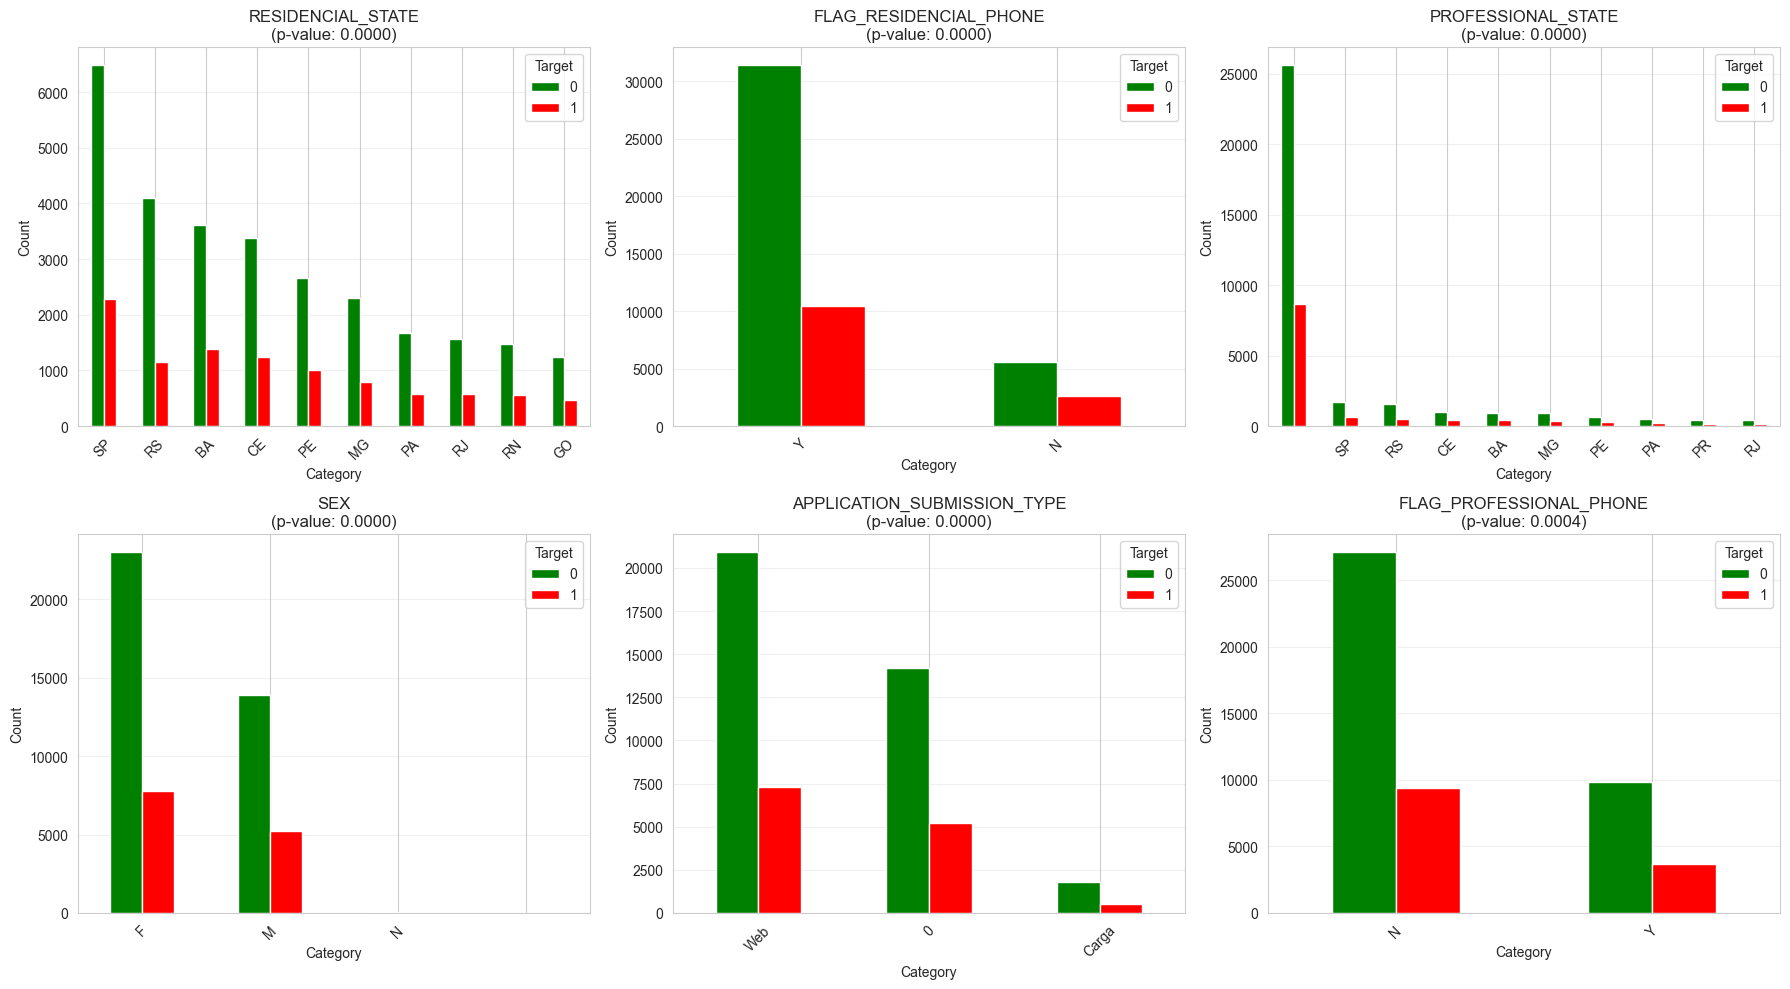

In [55]:
# Visualize top categorical features by target
top_cat_features = cat_influence_df.head(6)['Feature'].tolist()

if len(top_cat_features) > 0:
    n_cols = 3
    n_rows = (len(top_cat_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(top_cat_features[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Create stacked bar chart
        crosstab = pd.crosstab(df[col], df[target_col])
        
        # Get top 10 categories by frequency
        top_cats = crosstab.sum(axis=1).nlargest(10).index
        crosstab_top = crosstab.loc[top_cats]
        
        crosstab_top.plot(kind='bar', stacked=False, ax=ax, color=['green', 'red'])
        ax.set_title(f'{col}\n(p-value: {cat_influence_df[cat_influence_df["Feature"]==col]["P-value"].values[0]:.4f})')
        ax.set_xlabel('Category')
        ax.set_ylabel('Count')
        ax.legend(title='Target')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(top_cat_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Outliers Impact on Target


In [56]:
# Analyze if outliers are associated with specific target classes
print("="*70)
print("OUTLIERS IMPACT ON TARGET")
print("="*70)

top_outlier_features = outlier_df.head(5)['Column'].tolist()
outlier_target_analysis = []

for col in top_outlier_features:
    outliers_iqr, _, _ = detect_outliers_iqr(features_df, col)
    
    if len(outliers_iqr) > 0:
        # Get indices of outliers
        outlier_indices = outliers_iqr.index
        
        # Get target distribution for outliers vs non-outliers
        outlier_target_dist = df.loc[outlier_indices, target_col].value_counts(normalize=True) * 100
        non_outlier_indices = features_df.index.difference(outlier_indices)
        non_outlier_target_dist = df.loc[non_outlier_indices, target_col].value_counts(normalize=True) * 100
        
        # Calculate difference
        target_vals = sorted(df[target_col].unique())
        if len(target_vals) == 2:
            outlier_diff = abs(outlier_target_dist.get(target_vals[0], 0) - 
                              non_outlier_target_dist.get(target_vals[0], 0))
            
            outlier_target_analysis.append({
                'Feature': col,
                'N Outliers': len(outliers_iqr),
                f'Outliers - Class {target_vals[0]} %': round(outlier_target_dist.get(target_vals[0], 0), 2),
                f'Non-Outliers - Class {target_vals[0]} %': round(non_outlier_target_dist.get(target_vals[0], 0), 2),
                'Difference': round(outlier_diff, 2)
            })

outlier_target_df = pd.DataFrame(outlier_target_analysis)
if len(outlier_target_df) > 0:
    outlier_target_df = outlier_target_df.sort_values('Difference', ascending=False)
    print("\nOutlier distribution by target class:")
    print(outlier_target_df.to_string(index=False))
else:
    print("\nNo significant outlier-target relationships found.")


OUTLIERS IMPACT ON TARGET

Outlier distribution by target class:
        Feature  N Outliers  Outliers - Class 0 %  Non-Outliers - Class 0 %  Difference
    PAYMENT_DAY        8787                 68.16                     75.15        6.99
 MARITAL_STATUS        7913                 75.80                     73.56        2.24
        PRODUCT        7310                 73.06                     74.06        1.00
PROFESSION_CODE       12152                 74.67                     73.68        0.99
     FLAG_EMAIL        9886                 73.20                     74.09        0.89


### Summary of Deep Analysis


In [57]:
# Summary of findings
print("="*70)
print("SUMMARY OF DEEP ANALYSIS FINDINGS")
print("="*70)

print(f"\n1. TARGET VARIABLE: '{target_col}'")
print(f"   - Distribution: {dict(df[target_col].value_counts())}")
print(f"   - Balance: {df[target_col].value_counts(normalize=True).min()*100:.1f}% - {df[target_col].value_counts(normalize=True).max()*100:.1f}%")

print(f"\n2. OUTLIERS:")
if len(outlier_df) > 0:
    print(f"   - Columns with most outliers: {outlier_df.head(3)['Column'].tolist()}")
    print(f"   - Max outlier percentage: {outlier_df['Outliers % (IQR)'].max():.2f}%")

print(f"\n3. TOP NUMERICAL FEATURES INFLUENCING TARGET:")
if len(influence_df) > 0:
    top_3_num = influence_df.head(3)
    for _, row in top_3_num.iterrows():
        corr_sign = "+" if row['Correlation'] > 0 else "-"
        print(f"   - {row['Feature']}: {corr_sign}correlation = {abs(row['Correlation']):.4f}")

print(f"\n4. TOP CATEGORICAL FEATURES INFLUENCING TARGET:")
if len(cat_influence_df) > 0:
    top_3_cat = cat_influence_df.head(3)
    for _, row in top_3_cat.iterrows():
        print(f"   - {row['Feature']}: p-value = {row['P-value']:.6f} ({row['Significant (p<0.05)']})")

print(f"\n5. OUTLIER-TARGET RELATIONSHIPS:")
if len(outlier_target_df) > 0:
    print(f"   - Features where outliers affect target distribution:")
    for _, row in outlier_target_df.head(3).iterrows():
        print(f"     • {row['Feature']}: {row['Difference']:.2f}% difference")

print("\n" + "="*70)
print("Key insights:")
print("="*70)
print("• Features with high correlation/chi-square should be prioritized for modeling")
print("• Outliers should be reviewed - they may represent important edge cases")
print("• Consider feature engineering based on the differences between target classes")
print("="*70)


SUMMARY OF DEEP ANALYSIS FINDINGS

1. TARGET VARIABLE: 'TARGET_LABEL_BAD=1'
   - Distribution: {0: 36959, 1: 13041}
   - Balance: 26.1% - 73.9%

2. OUTLIERS:
   - Columns with most outliers: ['PROFESSION_CODE', 'FLAG_EMAIL', 'PAYMENT_DAY']
   - Max outlier percentage: 24.30%

3. TOP NUMERICAL FEATURES INFLUENCING TARGET:
   - AGE: -correlation = 0.1079
   - PAYMENT_DAY: +correlation = 0.0706
   - OCCUPATION_TYPE: +correlation = 0.0402

4. TOP CATEGORICAL FEATURES INFLUENCING TARGET:
   - RESIDENCIAL_STATE: p-value = 0.000000 (Yes)
   - FLAG_RESIDENCIAL_PHONE: p-value = 0.000000 (Yes)
   - PROFESSIONAL_STATE: p-value = 0.000000 (Yes)

5. OUTLIER-TARGET RELATIONSHIPS:
   - Features where outliers affect target distribution:
     • PAYMENT_DAY: 6.99% difference
     • MARITAL_STATUS: 2.24% difference
     • PRODUCT: 1.00% difference

Key insights:
• Features with high correlation/chi-square should be prioritized for modeling
• Outliers should be reviewed - they may represent important edg